# Paqueterías necesarias

In [1]:
import pandas as pd
from pandas import json_normalize
import requests
import json
from datetime import datetime
from datetime import timezone
import re 
from unidecode import unidecode
import nltk
from nltk.probability import FreqDist
from itertools import chain
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import seaborn as sns

import import_ipynb
import Funciones_Salud_Mental as sm

plt.rcParams["figure.figsize"] = (20,15)
plt.style.use('seaborn-poster')

pd.options.mode.chained_assignment = None 
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

importing Jupyter notebook from Funciones_Salud_Mental.ipynb


<h1><center>INDENTIFICAR DEPRESIÓN/TRISTEZA POR MEDIO DE CANCIONES</center></h1>

> __Autor__: David Montaño Castro

> __Facultad de Ciencias, UNAM.__

> Recuperación y Búsqueda de Información en Textos

__LIGAS DE INTERÉS__

Métricas Spotify: [Características de las canciones](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features)

Stemming idiomas: [SnowballStemming](https://www.nltk.org/_modules/nltk/stem/snowball.html)

Llaves musicales y emociones: [Interpretación1](https://wmich.edu/mus-theo/courses/keys.html) e [interpretación2](https://ledgernote.com/blog/interesting/musical-key-characteristics-emotions/)

# Introducción

En estos tiempos de pandemia, [el aumento de algunas enfermedades mentales ha sido bastante pronunciado en gente de todas las edades](https://www.imss.gob.mx/prensa/archivo/202107/301). Un típico refúgio es la música, y esta puede ayudarnos a expresar lo que sentimos y pensamos. La misión de este programa es ayudar a identificar la posible presencia de Depresión/tristeza en el individuo por medio de las canciones que ha escuchado en el último mes. 

# Conjuntos de datos

Si deseas trabajar con tu propio conjunto de datos, es decir, con tu _top 50_ canciones deL último mes, asegurate de checar el documento `API_datos`. Después, carga la infomación en formato CSV.

En su defecto, puedes trabajar con los conjuntos de datos predefinidos por el autor. 

## Tu información

In [2]:
#df = pd.read_csv("")

## Conjunto de datos por defecto

In [3]:
df = sm.Obtener_datos(1)
df_e = sm.Obtener_datos_estadisticos(1) 

In [4]:
sm.master(df,df_e,stopwords = ["yeah","woah","ohoh","yeahyeah","eeeeheheh","oooohoooh","woohoo","eyey"])

English  ¡disponible para stemmizar!
Spanish  ¡disponible para stemmizar!
French  ¡disponible para stemmizar!


'¡Todo listo!'

# ¿Cómo se ven tus canciones por idioma? (6 mn - 8 mn) ¡ES TARDADO!

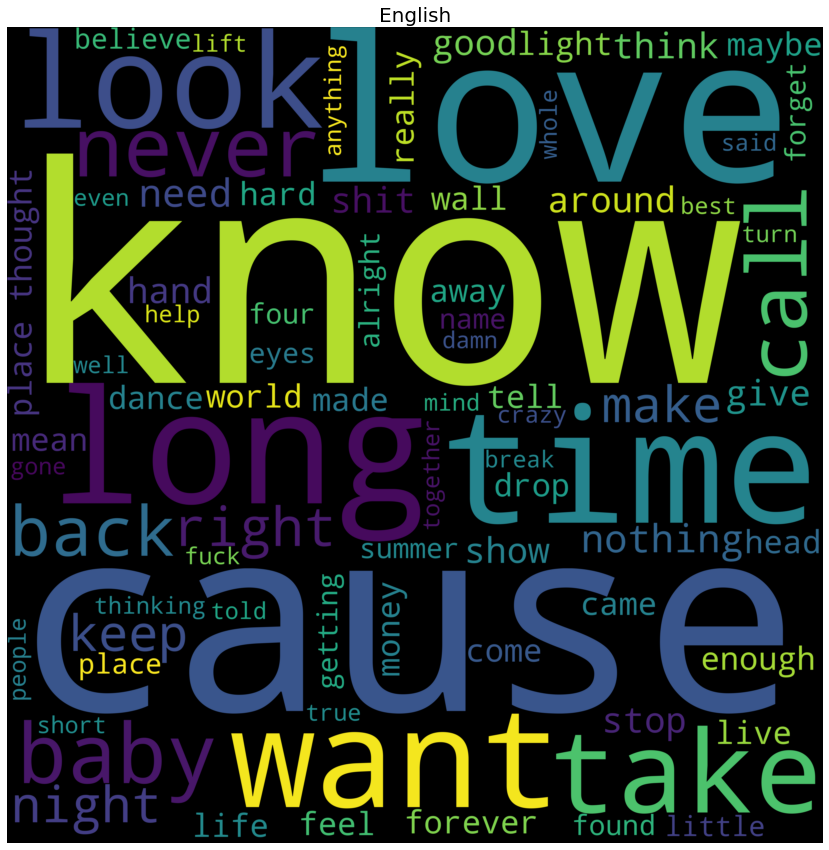

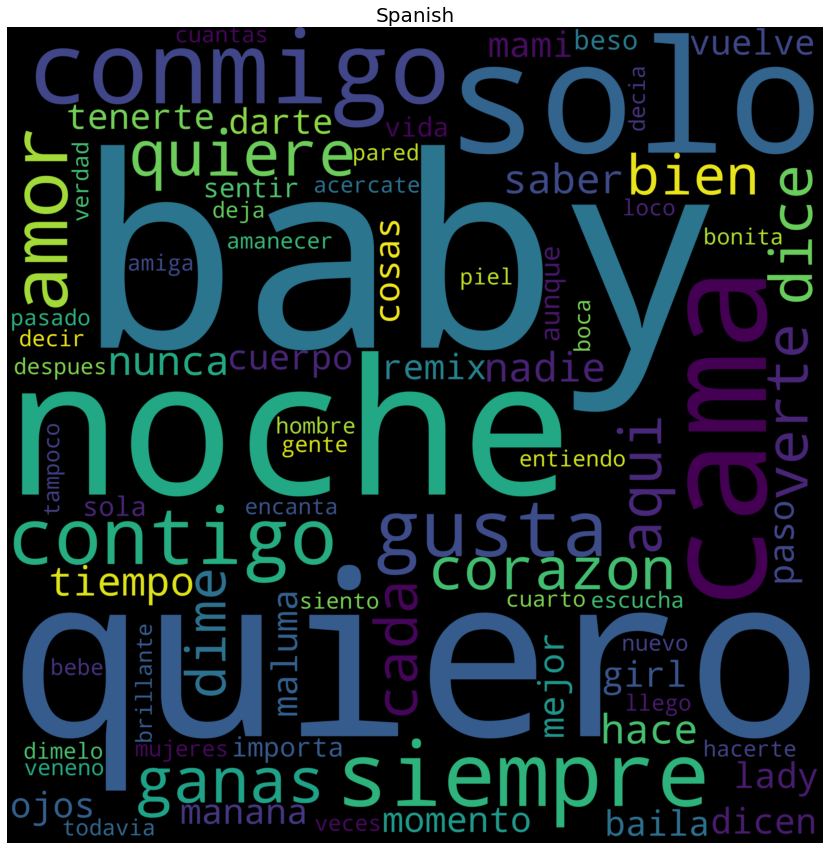

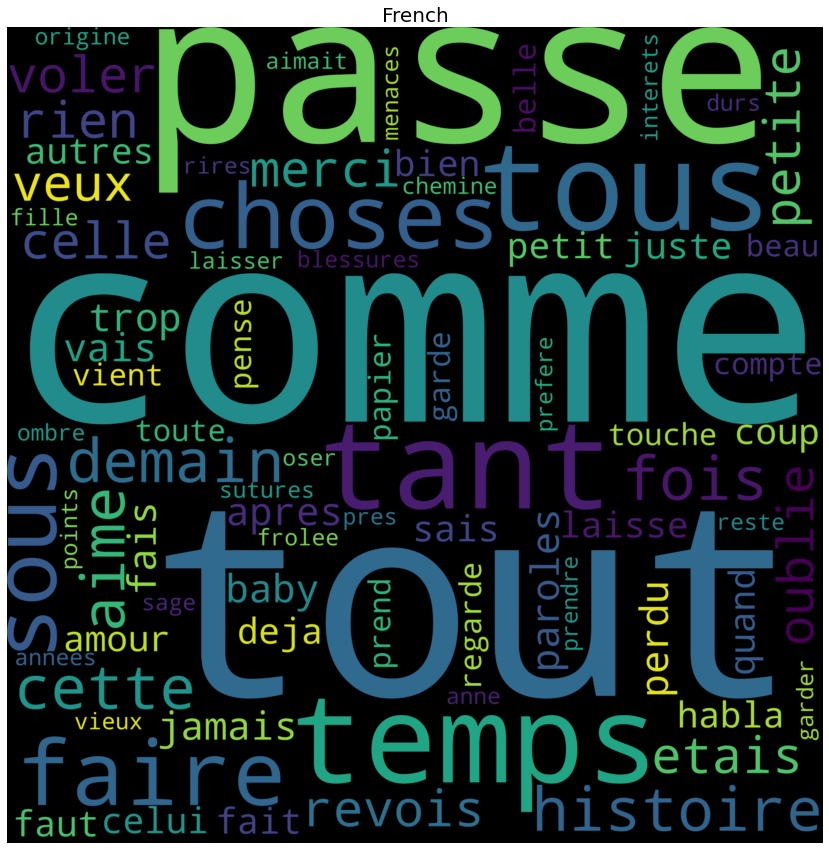

In [5]:
sm.WordClouds_idiomas(df)

# Palabras más representativas de cada una de tus canciones

Elige el idioma del cual te gustaría obtener las palabras más significativas por canción 

In [6]:
sm.palabras_mas_representativas_idioma(df, "Spanish")

{'Veneno': ['quier'],
 'Cuando Me Acerco A Ti': ['moment'],
 '11 PM': ['dej'],
 'Swing': ['batet',
  'olert',
  'demasi',
  'enred',
  'decent',
  'hechiz',
  'chin',
  'lad',
  'lanzam',
  'matam',
  'derrit',
  'detenert',
  'arrug',
  'pasart',
  'pel',
  'algun',
  'quer',
  'ajedrez',
  'rein',
  'sert',
  'swing'],
 'Hola - Remix': ['ser'],
 'Femme Fatal': ['gust', 'mir'],
 'Otro Trago - Remix': ['fum', 'acab', 'borrach'],
 'Vuelve': ['pas'],
 'Amor a Primera Vista': ['quiz', 'volv'],
 'Copas de Vino': ['camin', 'sal'],
 'Carmín (feat. Juan Luis Guerra)': ['yol',
  'harmoni',
  'vinci',
  'fantasi',
  'esplendor',
  'emocion',
  'dorm',
  'dibuj',
  'desnud',
  'deslumbr',
  'delfin',
  'cruz',
  'circ',
  'carmin',
  'cancion',
  'brutal',
  'arcoiris',
  'alumbr',
  'alient',
  'gogh',
  'flor',
  'acuarel',
  'increibl',
  'inund',
  'jardin',
  'undo',
  'manch',
  'mejill',
  'menguant',
  'mus',
  'nad',
  'suspir',
  'profund',
  'poet'],
 'Antes de Que Nos Olviden': ['olv

In [7]:
set(chain(*sm.palabras_mas_representativas_idioma(df, "Spanish").values()))

{'acab',
 'acuarel',
 'ajedrez',
 'algun',
 'alient',
 'alumbr',
 'arcoiris',
 'arrug',
 'batet',
 'borrach',
 'brutal',
 'camin',
 'cancion',
 'carmin',
 'chin',
 'circ',
 'cruz',
 'decent',
 'dej',
 'delfin',
 'demasi',
 'derrit',
 'deslumbr',
 'desnud',
 'detenert',
 'dibuj',
 'dorm',
 'emocion',
 'enred',
 'esplendor',
 'fantasi',
 'flor',
 'fum',
 'gogh',
 'gust',
 'harmoni',
 'hechiz',
 'increibl',
 'inund',
 'jardin',
 'lad',
 'lanzam',
 'llev',
 'manch',
 'matam',
 'mejill',
 'menguant',
 'mir',
 'moment',
 'mus',
 'nad',
 'olert',
 'olvid',
 'pas',
 'pasart',
 'pel',
 'pes',
 'poet',
 'profund',
 'quer',
 'quier',
 'quiz',
 'rein',
 'sal',
 'ser',
 'sert',
 'suspir',
 'swing',
 'undo',
 'vinci',
 'volv',
 'yol'}

## La probabilidad de que estés triste...

Consideremos el número de canciones tristes que reproduciste en tu mes:
Tipo
A toda madre           11
cansado/aburrido       15
fuera de este mundo    12
¿Todo bien,bro?         2
Name: name, dtype: int64 


Esto significa que la proporción de canciones tristes fue:  5.0 %


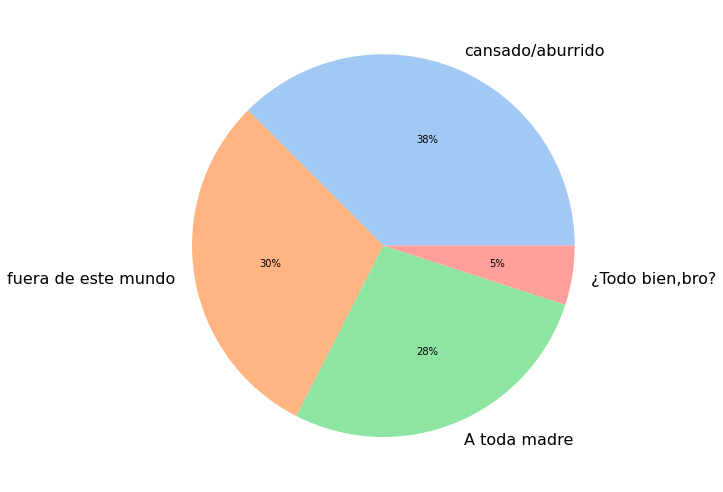

Estimo que en este último mes tú te sentiste, en la mayor parte del tiempo, cansado/aburrido 


No te sentiste ni muy triste ni muy feliz, más bien neutral. Eso no evitó que siguieras escuchando música tanto movida como algo más tranquilo.


In [8]:
sm.Estoy_triste_o_no(df)

## Evaluación del clasificador Bayesiano

Etiquetaré yo mismo el Dataset 1 para la evaluación con datos no vistos por el modelo. __Enfatizo que son con los datos del Documento 1__. 

Los scores son casi perfectos que hasta podría parecer en un sobre ajuste; sin embargo, y como ya lo mencioné, estos datos no fueron vistos por el modelo. De hecho, el único erro que tuvo fue porque la canción "Señorita" está escrita tanto en español como en francés.

In [9]:
pred = df.Idioma.tolist()

verdadero = ['English','English','Spanish','Spanish', 'English', 'French', 'English', 'Spanish', 'Spanish', 'English', 'English','Spanish', 'French', 'English', 'English', 'Spanish', 'Spanish', 'English', 'Spanish','English', 'Spanish', 'English', 'French', 'English', 'English', 'Spanish', 'English','English', 'Spanish', 'Spanish', 'Spanish', 'English', 'Spanish', 'French', 'English','English', 'Spanish', 'English', 'English','French']

target_names = ['English', 'Spanish', 'French']

print(classification_report(verdadero, pred, target_names=target_names))



              precision    recall  f1-score   support

     English       1.00      1.00      1.00        20
     Spanish       0.83      1.00      0.91         5
      French       1.00      0.93      0.97        15

    accuracy                           0.97        40
   macro avg       0.94      0.98      0.96        40
weighted avg       0.98      0.97      0.98        40

